### Libraries

In [1]:
import pandas as pd
import time
import cv2 as cv
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

# Model Training 

In [2]:
datadir = 'Image_Classification' # Specifying the directly where my/our file is located
categories = ['Cars', 'Ice cream cone', 'Cricket ball'] # Defining classes in the dataset


data_flat = [] # To store flatten images data(faltten is used for making picture 1_D)
target = []  # For storing the target the labels 

# Load data for each catagory
for category in categories:
    path = os.path.join(datadir, category) # Full path to the catagory directory 
    for image_file in os.listdir(path):    # Iterating over each image file in the category directory
        image = imread(os.path.join(path, image_file)) 
        image_resized = resize(image, (128, 64, 3))
        
        image_flat = image_resized.flatten() # flatting the image(making in 1-D)
        data_flat.append(image_flat)         # Store/append flatten images to data_flat list
        
        target.append(categories.index(category))  # Store/append index of catagory into the target list

data_flat = np.array(data_flat)  # Making data_flat an array
target = np.array(target)

df = pd.DataFrame(data_flat)     # Create pandas dataFrame to store flatten images
df['target'] = target 

### Spliting and FeatureScaling

In [4]:
# Separating the data into x and y sets
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Spliting into training and testing sets(for HOG)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_flat, target, test_size = 0.2, random_state = 0)

# Standardize the data
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Logistic Regression

C:\Users\safi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 14.963 seconds
Actual Values [2 0 0 2 2 1 1 2 2 2 0 0 1 1 2 0 2 1 0 2 2 0 0 1 0 2 1 2 2 2 0 0 0 1 0 0 0
 1 0 0 2 1 1 2 1 0 2 0 1 2 2 2 0 2 1 1 1 2 0 0 2 1 0 0 1 1 2 1 0 0 2 1 1 2
 1 2 1 0 1 0 1 1 0 2 2 1 0 0 2 2 2 2 2 2 1 2 0 1 2 2 1 2 0 2 2 2 1 2 1 2 1
 2 1 0 0 2 1 2 2 2 0 0 0 1 2 0 1 1 1 0 0 0 2 1 0 0 2 0 0 2 0 1 2 2 1 1 0 2
 2 1 0 2 1 2 1 2 0 0 2 1 1 1 1 0 2 1 0 2 0 1 2 2 0 2 2 2 0 0 2 2 1 2 0 2 1
 0 1 2 0 0 2 1 2 0 1 0 2 2]
Predicted Values [2 0 0 2 2 1 1 2 2 2 0 0 1 1 2 0 2 1 0 2 2 0 0 1 0 2 1 2 2 2 0 0 0 1 0 0 0
 1 0 1 2 1 1 2 1 0 2 0 1 2 2 2 0 2 1 1 1 2 0 0 2 1 0 0 1 1 2 1 0 0 2 1 1 2
 1 2 1 0 1 0 1 1 0 2 2 1 0 0 2 2 2 2 2 2 1 2 0 1 2 2 1 2 0 2 2 2 1 2 1 2 1
 2 1 0 0 2 1 2 2 2 0 0 0 1 2 0 1 1 1 2 0 2 2 1 0 0 2 0 0 2 0 1 2 2 1 1 0 2
 2 1 0 2 1 2 1 2 0 0 2 1 1 1 1 0 2 1 0 2 0 1 2 2 0 2 2 2 0 0 2 2 1 2 0 2 1
 0 1 2 0 0 2 1 2 0 1 0 1 2]
Accuracy for training of  :  1.0
Accuracy Test time in Logistic Regression :  0.9797979797979798
[[60  1  2]
 [ 0 58  0]
 [ 0  1 76]]

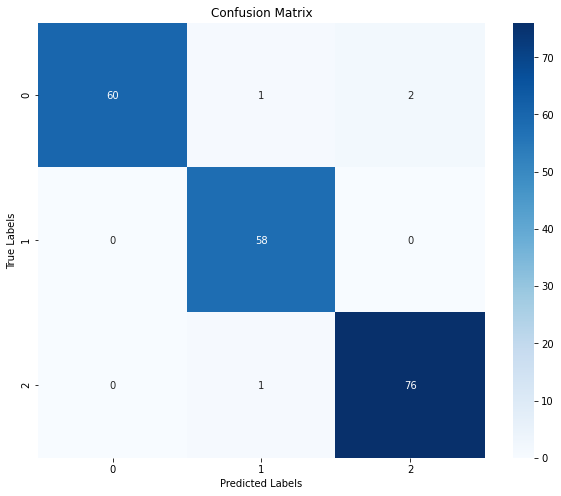

In [5]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()

start_time = time.time()    
classifier.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.3f} seconds".format(training_time))

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

print('Actual Values', y_test)
print('Predicted Values', y_pred)

print('Accuracy for training of  : ', accuracy_score(y_train, y_train_pred))
print('Accuracy Test time in Logistic Regression : ', accuracy_score(y_test, y_pred) )

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

## SVM

time complexity :7.402 
Traning Accuracy is :  1.0
Testing Accuracy is :  0.9797979797979798
[[61  1  1]
 [ 0 58  0]
 [ 1  1 75]]


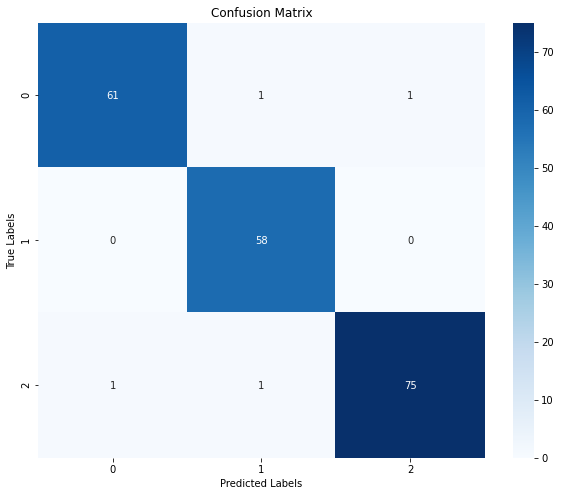

In [6]:
from sklearn.svm import SVC 

# Next we perform the step above of (data_Spliting and StandardScaler)

classifier = SVC(kernel = 'linear', random_state = 0)

start_time = time.time()
classifier.fit(x_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

y_pred_train = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

print('Traning Accuracy is : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy is : ', accuracy_score(y_test, y_pred))

# Now we can also find the cofusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

### Decision Tree

time complexity :11.167 
Training State Accuracy :  1.0
Testing state Accuracy :  0.8636363636363636
[[50  4  9]
 [ 1 53  4]
 [ 4  5 68]]


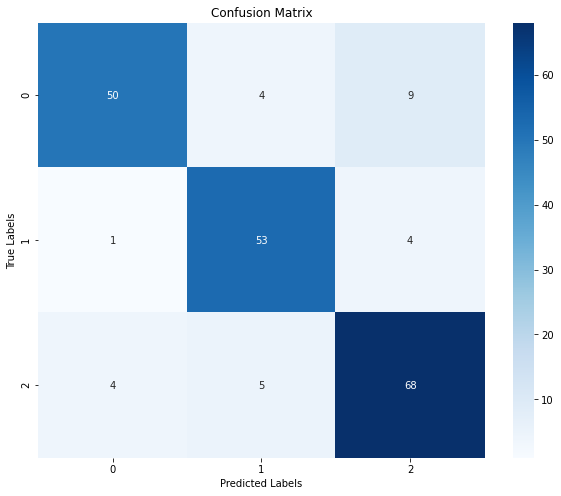

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini')

start_time = time.time()
tree.fit(x_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

y_train_pred = tree.predict(x_train)
y_pred = tree.predict(x_test)

print("Training State Accuracy : ", accuracy_score(y_train, y_train_pred))
print('Testing state Accuracy : ', accuracy_score(y_pred, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

### Random Forest

time complexity :1.143 
Accuracy Rate during Training :  0.9987325728770595
Accuracy Rate during Testing :  0.9393939393939394
[[61  1  1]
 [ 0 56  2]
 [ 5  3 69]]


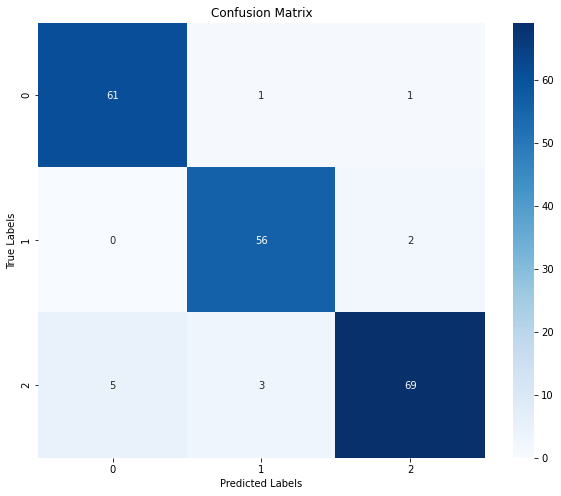

In [9]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10 ,criterion="entropy", random_state=0)

start_time=time.time()
forest.fit(x_train , y_train)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))
forest.score(x_train, y_train)

y_train_pred = forest.predict(x_train)
y_pred = forest.predict(x_test)

print("Accuracy Rate during Training : ",accuracy_score(y_train_pred, y_train))
print("Accuracy Rate during Testing : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()